In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
import warnings
warnings.simplefilter("ignore",category=FutureWarning)
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

In [2]:
df=pd.read_csv(r"C:\Users\user\Downloads\HR_Analytics.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [6]:
df["left"].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

Here we can see that the target values are imbalanced, with only 23.8% of the data being resignees.

In [7]:
df.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [8]:
df.groupby("Department").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
Department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [9]:
df.groupby("salary").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


In [10]:
mdh=df[df["salary"]=="high"].groupby("Department",as_index=False)["left"].mean()
mdh=mdh.sort_values(by="left",ascending=False)
mdh

,Department,left
3,hr,0.133333
9,technical,0.124378
5,marketing,0.112500
6,product_mng,0.088235
1,RandD,0.078431
2,accounting,0.067568
8,support,0.056738
7,sales,0.052045
0,IT,0.048193
4,management,0.004444


In [11]:
mdl=df[df["salary"]=="low"].groupby("Department",as_index=False)["left"].mean()
mdl=mdl.sort_values(by="left",ascending=False)
mdl

,Department,left
8,support,0.339442
7,sales,0.332063
4,management,0.327778
5,marketing,0.313433
0,IT,0.282430
2,accounting,0.276536
9,technical,0.275510
3,hr,0.274627
6,product_mng,0.232816
1,RandD,0.151099


In [12]:
mdm=df[df["salary"]=="medium"].groupby("Department",as_index=False)["left"].mean()
mdm=mdm.sort_values(by="left",ascending=False)
mdm

,Department,left
3,hr,0.325905
2,accounting,0.298507
9,technical,0.256321
6,product_mng,0.227154
0,IT,0.181308
5,marketing,0.180851
7,sales,0.170993
8,support,0.167728
1,RandD,0.166667
4,management,0.137778


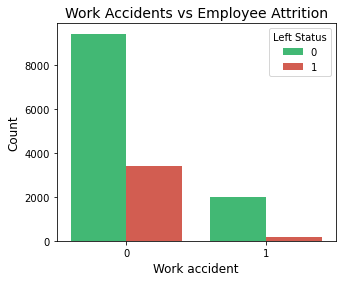

In [47]:
plt.figure(figsize=(5,4))
custom_palette = ["#2ecc71", "#e74c3c"]
sns.set_palette(custom_palette)
sns.countplot(x="Work_accident",hue="left",data=df)
plt.legend(title="Left Status", labels=["0", "1"])
plt.title("Work Accidents vs Employee Attrition", fontsize=14)
plt.xlabel("Work accident",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

This visualization suggests that employees who did not experience a work accident seem to have a higher likelihood of leaving the company compared to those who did experience a work accident. 
This could potentially indicate a correlation between work accidents and employee retention

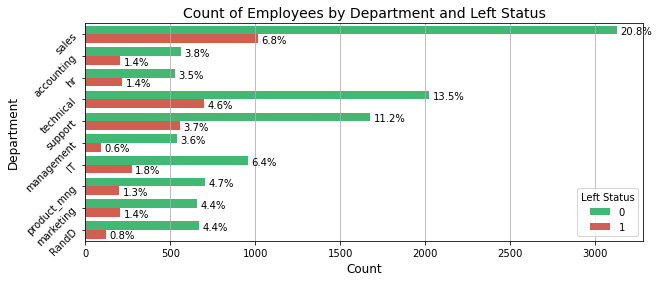

In [44]:
plt.figure(figsize=(10,4))
ax=sns.countplot(data=df,y="Department",hue="left")
plt.title("Count of Employees by Department and Left Status",fontsize=14)
plt.ylabel("Department",fontsize=12)
plt.xlabel("Count",fontsize=12)
plt.yticks(rotation=45)
plt.grid(axis='x') 
plt.legend(title="Left Status", labels=["0", "1"])
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width()+20
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))
plt.show()

The departments that experienced the highest employee turnover were sales, technical, and support. 
Among all the departments, the management department had the lowest employee count. 
Notably, the sales department had the highest number of employees who left.
Conversely, the management department had the least number of employees departing.

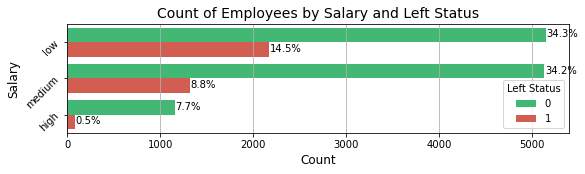

In [60]:
plt.figure(figsize=(9,2))
ax=sns.countplot(data=df,y="salary",hue="left")
plt.title("Count of Employees by Salary and Left Status",fontsize=14)
plt.xlabel("Count",fontsize=12)
plt.ylabel("Salary",fontsize=12)
plt.yticks(rotation=45)
plt.grid(axis='x') 
plt.legend(title="Left Status", labels=["0", "1"])
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 10
    y = p.get_y() + p.get_height() / 1.5
    ax.annotate(percentage, (x, y))
plt.show()

The majority of employees who departed the company had either low or medium salaries, while very few employees left who were receiving a high salary. 
It appears that the trend suggests that employees with lower to average salaries are more likely to leave the organization.

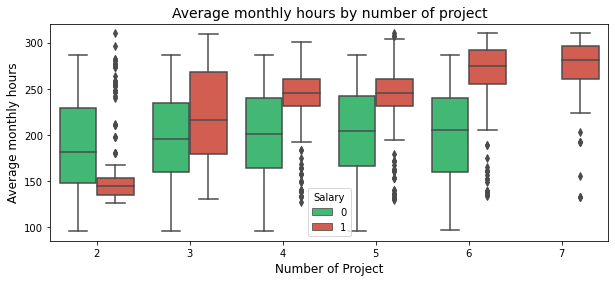

In [31]:
plt.figure(figsize=(10, 4))
custom_palette = ["#2ecc71", "#e74c3c", "#f39c12"]
sns.set_palette(custom_palette)
ax = sns.boxplot(x="number_project", y="average_montly_hours", hue="left", data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 25), 
                textcoords='offset points')
plt.title("Average monthly hours by number of project", fontsize=14)
plt.ylabel("Average monthly hours", fontsize=12)
plt.xlabel("Number of Project", fontsize=12)
plt.yticks(fontsize=10)
plt.legend(title="Salary")
plt.show()

It is evident that employees who remained with the company displayed a consistent pattern of "Average monthly hours," even as the number of projects increased. Conversely, employees who underwent turnover exhibited an upward trend in "Average monthly hours" alongside the rise in the number of projects.

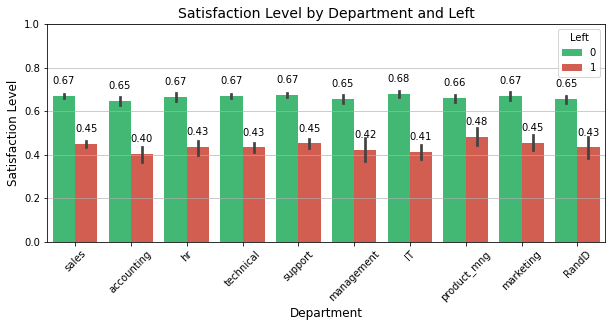

In [63]:
plt.figure(figsize=(10,4))
custom_palette = ["#2ecc71", "#e74c3c"]
sns.set_palette(custom_palette)
ax=sns.barplot(data=df,x="Department",y="satisfaction_level",hue="left")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 15), 
                textcoords='offset points')
plt.title("Satisfaction Level by Department and Left", fontsize=14)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Satisfaction Level", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.8)
plt.legend(title="Left")
plt.show()

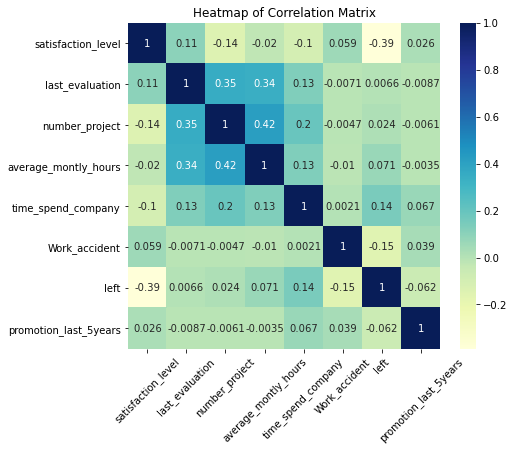

In [69]:
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title("Heatmap of Correlation Matrix")
plt.xticks(rotation=45)
plt.show()

Satisfication level also does not seems to have a good relation with column.

One Hot Encoding
We start by assigning numbers to categorical features such as salary range. For department separation, we will use one hot encoding

In [19]:
data=pd.get_dummies(df,columns=["salary"])

In [20]:
X=data.drop(["left","Department"],axis=1)
y=data["left"]

Standardizing the data is indeed a crucial step in preparing it for a machine learning algorithm to ensure optimal performance when dealing with new, unseen data. This process contributes to improved convergence during training and enhances the algorithm's ability to generalize well on data it hasn't encountered before.

In [21]:
X=StandardScaler().fit_transform(X)
X

array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.29980859,
         1.02477511, -0.8681323 ],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.29980859,
        -0.97582386,  1.15189816],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.29980859,
        -0.97582386,  1.15189816],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.29980859,
         1.02477511, -0.8681323 ],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.29980859,
         1.02477511, -0.8681323 ],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.29980859,
         1.02477511, -0.8681323 ]])

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
print("X-Train :",X_train.shape)
print("X-Test :",X_test.shape)
print("Y-Train :",y_test.shape)
print("Y-Test :",y_test.shape)

X-Train : (11999, 10)
X-Test : (3000, 10)
Y-Train : (3000,)
Y-Test : (3000,)


I'll choose 3 machine learning models for my data, Gradient Boosting, Decison Tree and Random Forest.

In [23]:
classification={
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}
result=pd.DataFrame(columns=["accuracy","precision","f1","recall"])
for method,func in classification.items():
    func.fit(X_train,y_train)
    y_pred=func.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    result.loc[method]=[accuracy,precision,f1,recall]
result

,accuracy,precision,f1,recall
Decision Tree,0.976000,0.935440,0.949791,0.964589
Random Forest,0.988333,0.986938,0.974910,0.963173
Gradient Boosting,0.974000,0.964497,0.943560,0.923513


The Random Forest model generally outperformed the other models across all metrics.
It had the highest accuracy, precision, and F1-score, indicating strong overall performance.
Decision Tree and Gradient Boosting also performed well but fell slightly behind Random Forest in terms of accuracy and precision.
Recall was highest for the Decision Tree model, indicating its strength in identifying employees who actually left the company.